## Community Health Equity Lab: New York COVID19 Response Analysis

In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 300
pd.set_option('display.max_rows', 500)

## Data

Data comes from the 2018 NY Census

The Definitive Healthcare Hospital Bed DB

Google Location Mobility Report (Feb 15 - Apr 11)

In [2]:
#reading zip code data and joining borough name
ny = pd.read_csv('data/ny18_cleaned.csv')
ny.head()

,GEOID_ZIP,ALAND10,AWATER10,tot_pop,white,per_white,black,per_black,native,per_native,asian,per_asian,nativehawaiian,per_hawaiian,other,per_other,two_or_mor,per_two_or,male,female,under_5,per_under_5,5_to_9,per_5_to_9,10_to_14,per_10_to_14,15_to_19,per_15_to_19,20_to_24,per_20_to_24,25_to_29,per_25_to_29,30_to_34,per_30_to_34,35_to_39,per_35_to_39,40_to_44,per_40_to_44,45_to_49,per_45_to_49,50_to_54,per_50_to_54,55_to_59,per_55_to_59,60_to_64,per_60_to_64,65_to_69,per_65_to_69,70_to_74,per_70_to_74,75_to_79,per_75_to_79,80_to_84,per_80_to_89,80_and_over,per_80_and_over,disabled,per_disabled,unemployment_rate,tot_households_snap,households_snap,per_households_snap,tot_pop_mobility,same_house,moved_within_1yr,less_10k,10k_15k,15k_25k,25k_35k,35k_50k,50k_75k,75k_100k,100k_150k,150k_200k,more_200k,med_income,mean_incom,speaks_only_english,naturalized,non_citizen,pop_pov,pop_below_,pcnt_pov,families_on_suplimental_income,families_on_social_security,2_ppl_fam,3_to_4_ppl,5_to_6_ppl,GT_7_ppl_f,insured,per_insured,uninsured,per_uninsured,owner,rent,4_16_2020_positive,4_16_2020_tests,4_16_2020_positive_rate,4_2_2020_positive,4_2_2020_tests,4_2_2020_positive_rate,4_3_2020_positive,4_3_2020_tests,4_3_2020_positive_rate,4_7_2020_positive,4_7_2020_tests,4_7_2020_positive_rate,4_8_2020_positive,4_8_2020_tests,4_8_2020_positive_rate,hospital_count,3_26_bb_beds,4_2_bb_beds,4_7_bb_beds,licensed_beds,staffed_beds,ICU_beds,adult_icu_beds,pediatrics_icu_beds,bed_utilization_rate,potential_increase_bed_capacity,avg_ventilator_use
0,10065,984654,0,28109,24285,86.4,619,2.2,37,0.1,2666,9.5,0,0.0,154,0.5,348,1.2,12248,15861,1650,5.9,1000,3.6,916,3.3,356,1.3,1785,6.4,2671,9.5,3176,11.3,2558,9.1,1607,5.7,1570,5.6,1796,6.4,1460,5.2,1522,5.4,1388,4.9,1486,5.3,1159,4.1,954,3.4,1055,3.8,1894,6.8,70.2,14844,414,2.8,27635,22612,2247,5.0,2.7,4.0,2.7,6.2,10.6,8.8,14.4,9.8,35.8,127375,242978,19681,3045,3306,27963,1922,3.0,109,1683,3797,2267,275,13,27299,97.3,744,2.7,5365,9479,233,682,34.16,121,385,0.314286,121,385,0.314286,171,492,34.76,187,544,34.38,14,7625,7993,7993,6493,5519,745,745,402,6.647990,974,181
1,10069,249050,0,5085,3155,62.0,148,2.9,0,0.0,1558,30.6,0,0.0,0,0.0,224,4.4,2354,2731,368,7.2,416,8.2,274,5.4,95,1.9,235,4.6,427,8.4,594,11.7,639,12.6,508,10.0,374,7.4,378,7.4,235,4.6,197,3.9,61,1.2,87,1.7,109,2.1,0,0.0,88,1.7,182,3.6,74.7,2552,73,2.9,5025,3790,859,8.7,3.2,0.0,9.8,5.7,4.2,14.7,11.4,11.6,30.9,110625,225183,2922,331,1207,5085,522,7.3,25,88,517,662,27,0,4992,98.2,93,1.8,675,1877,40,105,38.10,24,57,0.421053,24,57,0.421053,29,72,40.28,32,81,39.51,9,4922,4922,4922,4093,3765,410,410,273,4.741397,328,138
2,10075,477137,0,21556,18396,85.3,677,3.1,225,1.0,1047,4.9,0,0.0,902,4.2,309,1.4,10096,11460,1041,4.8,1252,5.8,736,3.4,763,3.5,778,3.6,1400,6.5,2022,9.4,1643,7.6,1148,5.3,1453,6.7,1244,5.8,1118,5.2,1131,5.2,1561,7.2,1276,5.9,1169,5.4,570,2.6,1251,5.8,1689,8.0,68.1,11035,217,2.0,21381,18455,1508,1.9,0.8,4.8,6.4,5.0,12.8,10.6,17.9,9.6,30.3,137146,233358,13727,3315,2372,21155,1075,4.5,129,1401,3133,1765,236,0,20715,97.9,440,2.1,4933,6102,294,631,46.59,160,371,0.431267,160,371,0.431267,204,452,45.13,232,501,46.31,15,7573,7729,7729,6277,5678,788,788,412,7.253486,599,198
3,10128,1206191,0,59256,47167,79.6,2182,3.7,0,0.0,5844,9.9,0,0.0,1666,2.8,2397,4.0,25338,33918,3204,5.4,2138,3.6,1911,3.2,1691,2.9,2644,4.5,6825,11.5,7216,12.2,4349,7.3,3849,6.5,4103,6.9,3845,6.5,2989,5.0,3494,5.9,3461,5.8,2656,4.5,1980,3.3,1557,2.6,1344,2.3,4825,8.1,72.2,30691,1506,4.9,58419,48263,4921,4.5,2.2,6.5,3.6,5.6,12.4,11.2,14.6,10.0,29.4,114010,196844,39143,7054,6535,58980,3686,3.4,500,3513,8171,5192,530,3,57424,96.9,1820,3.1,10129,20562,460,1207,38.11,212,596,0.355705,212,596,0.355705,281,737,38.13,317,834,38.01,13,5936,6233,6233,4713,4177,514,514,337,6.464822,536,147
4,10280,297253,38409,9384,7360,78.4,184,2.0,0,0.0,1474,15.7,0,0.0,77,0.8,289,3.1,4477,4907,711,7.6,628,6.7,454,4.8,192,2.0,239,2.5,523,5.6,1374,14.6,945,10.1,1021,10.9,771,8.2,763,8.1,530,5.6,375,4.0,370,3.9,254,2.7,

In [3]:
boroughs_zip = pd.read_csv('data/bor_zip_codes.csv')
ny = pd.merge(ny,boroughs_zip[['GEOID10', 'borough']], left_on='GEOID_ZIP', right_on='GEOID10')
del(boroughs_zip)
ny.head()

,GEOID_ZIP,ALAND10,AWATER10,tot_pop,white,per_white,black,per_black,native,per_native,asian,per_asian,nativehawaiian,per_hawaiian,other,per_other,two_or_mor,per_two_or,male,female,under_5,per_under_5,5_to_9,per_5_to_9,10_to_14,per_10_to_14,15_to_19,per_15_to_19,20_to_24,per_20_to_24,25_to_29,per_25_to_29,30_to_34,per_30_to_34,35_to_39,per_35_to_39,40_to_44,per_40_to_44,45_to_49,per_45_to_49,50_to_54,per_50_to_54,55_to_59,per_55_to_59,60_to_64,per_60_to_64,65_to_69,per_65_to_69,70_to_74,per_70_to_74,75_to_79,per_75_to_79,80_to_84,per_80_to_89,80_and_over,per_80_and_over,disabled,per_disabled,unemployment_rate,tot_households_snap,households_snap,per_households_snap,tot_pop_mobility,same_house,moved_within_1yr,less_10k,10k_15k,15k_25k,25k_35k,35k_50k,50k_75k,75k_100k,100k_150k,150k_200k,more_200k,med_income,mean_incom,speaks_only_english,naturalized,non_citizen,pop_pov,pop_below_,pcnt_pov,families_on_suplimental_income,families_on_social_security,2_ppl_fam,3_to_4_ppl,5_to_6_ppl,GT_7_ppl_f,insured,per_insured,uninsured,per_uninsured,owner,rent,4_16_2020_positive,4_16_2020_tests,4_16_2020_positive_rate,4_2_2020_positive,4_2_2020_tests,4_2_2020_positive_rate,4_3_2020_positive,4_3_2020_tests,4_3_2020_positive_rate,4_7_2020_positive,4_7_2020_tests,4_7_2020_positive_rate,4_8_2020_positive,4_8_2020_tests,4_8_2020_positive_rate,hospital_count,3_26_bb_beds,4_2_bb_beds,4_7_bb_beds,licensed_beds,staffed_beds,ICU_beds,adult_icu_beds,pediatrics_icu_beds,bed_utilization_rate,potential_increase_bed_capacity,avg_ventilator_use,GEOID10,borough
0,10065,984654,0,28109,24285,86.4,619,2.2,37,0.1,2666,9.5,0,0.0,154,0.5,348,1.2,12248,15861,1650,5.9,1000,3.6,916,3.3,356,1.3,1785,6.4,2671,9.5,3176,11.3,2558,9.1,1607,5.7,1570,5.6,1796,6.4,1460,5.2,1522,5.4,1388,4.9,1486,5.3,1159,4.1,954,3.4,1055,3.8,1894,6.8,70.2,14844,414,2.8,27635,22612,2247,5.0,2.7,4.0,2.7,6.2,10.6,8.8,14.4,9.8,35.8,127375,242978,19681,3045,3306,27963,1922,3.0,109,1683,3797,2267,275,13,27299,97.3,744,2.7,5365,9479,233,682,34.16,121,385,0.314286,121,385,0.314286,171,492,34.76,187,544,34.38,14,7625,7993,7993,6493,5519,745,745,402,6.647990,974,181,10065,Manhattan
1,10069,249050,0,5085,3155,62.0,148,2.9,0,0.0,1558,30.6,0,0.0,0,0.0,224,4.4,2354,2731,368,7.2,416,8.2,274,5.4,95,1.9,235,4.6,427,8.4,594,11.7,639,12.6,508,10.0,374,7.4,378,7.4,235,4.6,197,3.9,61,1.2,87,1.7,109,2.1,0,0.0,88,1.7,182,3.6,74.7,2552,73,2.9,5025,3790,859,8.7,3.2,0.0,9.8,5.7,4.2,14.7,11.4,11.6,30.9,110625,225183,2922,331,1207,5085,522,7.3,25,88,517,662,27,0,4992,98.2,93,1.8,675,1877,40,105,38.10,24,57,0.421053,24,57,0.421053,29,72,40.28,32,81,39.51,9,4922,4922,4922,4093,3765,410,410,273,4.741397,328,138,10069,Manhattan
2,10075,477137,0,21556,18396,85.3,677,3.1,225,1.0,1047,4.9,0,0.0,902,4.2,309,1.4,10096,11460,1041,4.8,1252,5.8,736,3.4,763,3.5,778,3.6,1400,6.5,2022,9.4,1643,7.6,1148,5.3,1453,6.7,1244,5.8,1118,5.2,1131,5.2,1561,7.2,1276,5.9,1169,5.4,570,2.6,1251,5.8,1689,8.0,68.1,11035,217,2.0,21381,18455,1508,1.9,0.8,4.8,6.4,5.0,12.8,10.6,17.9,9.6,30.3,137146,233358,13727,3315,2372,21155,1075,4.5,129,1401,3133,1765,236,0,20715,97.9,440,2.1,4933,6102,294,631,46.59,160,371,0.431267,160,371,0.431267,204,452,45.13,232,501,46.31,15,7573,7729,7729,6277,5678,788,788,412,7.253486,599,198,10075,Manhattan
3,10128,1206191,0,59256,47167,79.6,2182,3.7,0,0.0,5844,9.9,0,0.0,1666,2.8,2397,4.0,25338,33918,3204,5.4,2138,3.6,1911,3.2,1691,2.9,2644,4.5,6825,11.5,7216,12.2,4349,7.3,3849,6.5,4103,6.9,3845,6.5,2989,5.0,3494,5.9,3461,5.8,2656,4.5,1980,3.3,1557,2.6,1344,2.3,4825,8.1,72.2,30691,1506,4.9,58419,48263,4921,4.5,2.2,6.5,3.6,5.6,12.4,11.2,14.6,10.0,29.4,114010,196844,39143,7054,6535,58980,3686,3.4,500,3513,8171,5192,530,3,57424,96.9,1820,3.1,10129,20562,460,1207,38.11,212,596,0.355705,212,596,0.355705,281,737,38.13,317,834,38.01,13,5936,6233,6233,4713,4177,514,514,337,6.464822,536,147,10128,Manhattan
4,10280,297253,38409,9384,7360,78.4,184,2.0,0,0.0,1474,15.7,0,0.0,77,0.8,289,3.1,4477,4907,711,7.6,628,6.7,454,4.8,192,2.0,239,2.5,523,5

In [4]:
# ny.drop(['GEOID10_x', 'GEOID10_y', 'borough_y'], axis=1, inplace=True)
# ny.rename(columns={"borough_x": "borough"})
# ny.head()

In [5]:
gm = pd.read_csv('data/Google_Mobility_Report_Filtered.csv')
gm.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,New York,Bronx,2/15/2020,0,-8,-5,-3,0,1
1,US,United States,New York,Bronx,2/16/2020,-1,-4,5,-2,-2,0
2,US,United States,New York,Bronx,2/17/2020,3,-8,-11,-22,-38,10
3,US,United States,New York,Bronx,2/18/2020,-2,-6,-11,-7,-10,3
4,US,United States,New York,Bronx,2/19/2020,2,-6,0,-6,-9,2


In [6]:
# using an aggregate of drop in baseline from "normal" starting from Feb 15 - Apr 11
# figured an aggregate would be best way to deal with the abundance of data
gm_agg = gm.groupby(['sub_region_2']).agg({col: ['sum'] for col in ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']})
gm_agg.columns = ['_'.join(multi_index) for multi_index in gm_agg.columns.ravel()]
gm_agg = gm_agg.reset_index()
gm_agg

,sub_region_2,retail_and_recreation_percent_change_from_baseline_sum,grocery_and_pharmacy_percent_change_from_baseline_sum,parks_percent_change_from_baseline_sum,transit_stations_percent_change_from_baseline_sum,workplaces_percent_change_from_baseline_sum,residential_percent_change_from_baseline_sum
0,Bronx,-1155,-211,-758,-1366,-1437,611
1,Brooklyn,-1407,-249,-45,-1677,-1601,715
2,Manhattan,-2296,-1006,-1544,-2199,-1926,777
3,Queens,-1470,-315,500,-1986,-1650,778
4,Staten Island,-1239,-254,-229,-1643,-1407,660


In [7]:
ny = pd.merge(ny, gm_agg, left_on='borough', right_on='sub_region_2')
ny.sample(10).head(10)

,GEOID_ZIP,ALAND10,AWATER10,tot_pop,white,per_white,black,per_black,native,per_native,asian,per_asian,nativehawaiian,per_hawaiian,other,per_other,two_or_mor,per_two_or,male,female,under_5,per_under_5,5_to_9,per_5_to_9,10_to_14,per_10_to_14,15_to_19,per_15_to_19,20_to_24,per_20_to_24,25_to_29,per_25_to_29,30_to_34,per_30_to_34,35_to_39,per_35_to_39,40_to_44,per_40_to_44,45_to_49,per_45_to_49,50_to_54,per_50_to_54,55_to_59,per_55_to_59,60_to_64,per_60_to_64,65_to_69,per_65_to_69,70_to_74,per_70_to_74,75_to_79,per_75_to_79,80_to_84,per_80_to_89,80_and_over,per_80_and_over,disabled,per_disabled,unemployment_rate,tot_households_snap,households_snap,per_households_snap,tot_pop_mobility,same_house,moved_within_1yr,less_10k,10k_15k,15k_25k,25k_35k,35k_50k,50k_75k,75k_100k,100k_150k,150k_200k,more_200k,med_income,mean_incom,speaks_only_english,naturalized,non_citizen,pop_pov,pop_below_,pcnt_pov,families_on_suplimental_income,families_on_social_security,2_ppl_fam,3_to_4_ppl,5_to_6_ppl,GT_7_ppl_f,insured,per_insured,uninsured,per_uninsured,owner,rent,4_16_2020_positive,4_16_2020_tests,4_16_2020_positive_rate,4_2_2020_positive,4_2_2020_tests,4_2_2020_positive_rate,4_3_2020_positive,4_3_2020_tests,4_3_2020_positive_rate,4_7_2020_positive,4_7_2020_tests,4_7_2020_positive_rate,4_8_2020_positive,4_8_2020_tests,4_8_2020_positive_rate,hospital_count,3_26_bb_beds,4_2_bb_beds,4_7_bb_beds,licensed_beds,staffed_beds,ICU_beds,adult_icu_beds,pediatrics_icu_beds,bed_utilization_rate,potential_increase_bed_capacity,avg_ventilator_use,GEOID10,borough,sub_region_2,retail_and_recreation_percent_change_from_baseline_sum,grocery_and_pharmacy_percent_change_from_baseline_sum,parks_percent_change_from_baseline_sum,transit_stations_percent_change_from_baseline_sum,workplaces_percent_change_from_baseline_sum,residential_percent_change_from_baseline_sum
22,10021,986790,0,46215,38017,82.3,420,0.9,158,0.3,4333,9.4,40,0.1,2069,4.5,1178,2.5,21010,25205,2869,6.2,2303,5.0,1760,3.8,950,2.1,880,1.9,3578,7.7,5750,12.4,4542,9.8,2628,5.7,2701,5.8,2797,6.1,3076,6.7,2131,4.6,2930,6.3,2275,4.9,1991,4.3,1721,3.7,1333,2.9,3867,8.4,68.9,24996,411,1.6,45496,37962,4154,5.3,1.2,4.0,3.8,5.6,12.6,11.5,13.2,9.8,33.0,118289,222872,33691,4849,4802,45697,2185,1.7,206,2747,5415,4248,365,125,43958,95.9,1902,4.1,11252,13744,412,1070,38.50,211,562,0.375445,211,562,0.375445,282,726,38.84,298,799,37.30,14,7625,7993,7993,6493,5519,745,745,402,6.647990,974,181,10021,Manhattan,Manhattan,-2296,-1006,-1544,-2199,-1926,777
19,10017,820953,0,15801,11683,73.9,370,2.3,0,0.0,3352,21.2,0,0.0,81,0.5,315,2.0,7134,8667,483,3.1,186,1.2,266,1.7,303,1.9,948,6.0,2646,16.7,1676,10.6,1509,9.6,827,5.2,704,4.5,1172,7.4,844,5.3,874,5.5,1109,7.0,1156,7.3,569,3.6,296,1.9,233,1.5,1083,6.9,76.4,9905,195,2.0,15586,13335,887,3.9,1.4,5.6,3.9,4.7,13.2,9.7,16.4,16.3,25.0,127506,174635,10594,2671,2430,15801,975,2.3,96,740,2113,790,71,0,15190,96.1,611,3.9,4320,5585,100,287,34.84,45,138,0.326087,45,138,0.326087,65,187,34.76,74,217,34.10,13,6010,6222,6222,5090,4272,649,649,353,5.507046,818,142,10017,Manhattan,Manhattan,-2296,-1006,-1544,-2199,-1926,777
92,11232,3084817,234,27602,11391,41.3,1772,6.4,288,1.0,5278,19.1,0,0.0,7519,27.2,1354,4.9,14304,13298,1756,6.4,2008,7.3,1328,4.8,1286,4.7,1790,6.5,3251,11.8,3112,11.3,2700,9.8,1975,7.2,2039,7.4,1837,6.7,1225,4.4,1083,3.9,800,2.9,564,2.0,375,1.4,288,1.0,185,0.7,2357,9.2,64.6,8812,1940,22.0,27222,23776,1775,6.7,7.1,6.7,9.2,15.8,14.8,13.1,14.8,5.4,6.4,56661,78443,8698,4529,6369,25379,5494,21.3,730,982,1956,2843,852,162,21935,85.5,3708,14.5,2222,6590,316,470,67.23,85,150,0.566667,85,150,0.566667,169,264,64.02,203,317,64.04,3,1812,1812,1812,1746,1480,96,96,65,2.609718,266,62,11232,Brooklyn,Brooklyn,-1407,-249,-45,-1677,-1601,715
57,10452,2559781,0,76078,9592,12.6,25249,33.2,285,0.4,1107,1.5,171,0.2,36163,47.5,3511,4.6,34800,41278,5322,7.0,6110,8.0,6605,8.7,5939,7.8,6311,8.3,5940,7.8,6242,8.2,5050,6.6,5411,7.1,4669,6.1,4995,6.6,4242,5.6,3090,4.1,1929,2.5,1975,2.6,978,1.3,572,0.8,698,0.9

## Data Transformations

In [9]:
ny['per_minority'] =  ny['per_black'] + ny['per_native'] + ny['per_asian'] + ny['per_hawaiian'] + ny['per_other'] + ny['per_two_or'] 

In [10]:
conditions = [(ny['per_minority'] <= 50.0),
              (ny['per_minority'] > 50.0)]
choices = [0,1]

ny['minority-majority-50'] = np.select(conditions, choices, default=2)

In [11]:
conditions = [(ny['per_minority'] <= 60.0),
              (ny['per_minority'] > 60.0)]
choices = [0,1]

ny['minority-majority-60'] = np.select(conditions, choices, default=2)

In [12]:
conditions = [(ny['per_minority'] <= 70.0),
              (ny['per_minority'] > 70.0)]
choices = [0,1]

ny['minority-majority-70'] = np.select(conditions, choices, default=2)

In [18]:
ny["pop_density"] = ny['tot_pop']/ny['ALAND10']
ny['per_infected'] = ny['4_16_2020_positive']/ny['tot_pop']
ny['change_in_bed'] = ny['4_7_bb_beds']-ny['3_26_bb_beds']
ny['per_male'] = ny['male']/ny['tot_pop']
ny['per_female'] = ny['female']/ny['tot_pop']

In [19]:
old_columns = [x for x in ny.columns if x not in ['per_minority', 'minority-majority-50', 'minority-majority-60', 'minority-majority-70',"pop_density",'per_infected','change_in_bed', 'per_female', 'per_male']]
insert_index = old_columns.index('4_16_2020_positive')
ny = ny[old_columns[:insert_index] + ['per_minority', 'minority-majority-50', 'minority-majority-60', 'minority-majority-70',"pop_density",'per_infected','change_in_bed','per_female', 'per_male'] + old_columns[insert_index:]]

In [20]:
ny.head()

,GEOID_ZIP,ALAND10,AWATER10,tot_pop,white,per_white,black,per_black,native,per_native,asian,per_asian,nativehawaiian,per_hawaiian,other,per_other,two_or_mor,per_two_or,male,female,under_5,per_under_5,5_to_9,per_5_to_9,10_to_14,per_10_to_14,15_to_19,per_15_to_19,20_to_24,per_20_to_24,25_to_29,per_25_to_29,30_to_34,per_30_to_34,35_to_39,per_35_to_39,40_to_44,per_40_to_44,45_to_49,per_45_to_49,50_to_54,per_50_to_54,55_to_59,per_55_to_59,60_to_64,per_60_to_64,65_to_69,per_65_to_69,70_to_74,per_70_to_74,75_to_79,per_75_to_79,80_to_84,per_80_to_89,80_and_over,per_80_and_over,disabled,per_disabled,unemployment_rate,tot_households_snap,households_snap,per_households_snap,tot_pop_mobility,same_house,moved_within_1yr,less_10k,10k_15k,15k_25k,25k_35k,35k_50k,50k_75k,75k_100k,100k_150k,150k_200k,more_200k,med_income,mean_incom,speaks_only_english,naturalized,non_citizen,pop_pov,pop_below_,pcnt_pov,families_on_suplimental_income,families_on_social_security,2_ppl_fam,3_to_4_ppl,5_to_6_ppl,GT_7_ppl_f,insured,per_insured,uninsured,per_uninsured,owner,rent,per_minority,minority-majority-50,minority-majority-60,minority-majority-70,pop_density,per_infected,change_in_bed,per_female,per_male,4_16_2020_positive,4_16_2020_tests,4_16_2020_positive_rate,4_2_2020_positive,4_2_2020_tests,4_2_2020_positive_rate,4_3_2020_positive,4_3_2020_tests,4_3_2020_positive_rate,4_7_2020_positive,4_7_2020_tests,4_7_2020_positive_rate,4_8_2020_positive,4_8_2020_tests,4_8_2020_positive_rate,hospital_count,3_26_bb_beds,4_2_bb_beds,4_7_bb_beds,licensed_beds,staffed_beds,ICU_beds,adult_icu_beds,pediatrics_icu_beds,bed_utilization_rate,potential_increase_bed_capacity,avg_ventilator_use,GEOID10,borough,sub_region_2,retail_and_recreation_percent_change_from_baseline_sum,grocery_and_pharmacy_percent_change_from_baseline_sum,parks_percent_change_from_baseline_sum,transit_stations_percent_change_from_baseline_sum,workplaces_percent_change_from_baseline_sum,residential_percent_change_from_baseline_sum
0,10065,984654,0,28109,24285,86.4,619,2.2,37,0.1,2666,9.5,0,0.0,154,0.5,348,1.2,12248,15861,1650,5.9,1000,3.6,916,3.3,356,1.3,1785,6.4,2671,9.5,3176,11.3,2558,9.1,1607,5.7,1570,5.6,1796,6.4,1460,5.2,1522,5.4,1388,4.9,1486,5.3,1159,4.1,954,3.4,1055,3.8,1894,6.8,70.2,14844,414,2.8,27635,22612,2247,5.0,2.7,4.0,2.7,6.2,10.6,8.8,14.4,9.8,35.8,127375,242978,19681,3045,3306,27963,1922,3.0,109,1683,3797,2267,275,13,27299,97.3,744,2.7,5365,9479,13.5,0,0,0,0.028547,0.008289,368,0.564268,0.435732,233,682,34.16,121,385,0.314286,121,385,0.314286,171,492,34.76,187,544,34.38,14,7625,7993,7993,6493,5519,745,745,402,6.647990,974,181,10065,Manhattan,Manhattan,-2296,-1006,-1544,-2199,-1926,777
1,10069,249050,0,5085,3155,62.0,148,2.9,0,0.0,1558,30.6,0,0.0,0,0.0,224,4.4,2354,2731,368,7.2,416,8.2,274,5.4,95,1.9,235,4.6,427,8.4,594,11.7,639,12.6,508,10.0,374,7.4,378,7.4,235,4.6,197,3.9,61,1.2,87,1.7,109,2.1,0,0.0,88,1.7,182,3.6,74.7,2552,73,2.9,5025,3790,859,8.7,3.2,0.0,9.8,5.7,4.2,14.7,11.4,11.6,30.9,110625,225183,2922,331,1207,5085,522,7.3,25,88,517,662,27,0,4992,98.2,93,1.8,675,1877,37.9,0,0,0,0.020418,0.007866,0,0.537070,0.462930,40,105,38.10,24,57,0.421053,24,57,0.421053,29,72,40.28,32,81,39.51,9,4922,4922,4922,4093,3765,410,410,273,4.741397,328,138,10069,Manhattan,Manhattan,-2296,-1006,-1544,-2199,-1926,777
2,10075,477137,0,21556,18396,85.3,677,3.1,225,1.0,1047,4.9,0,0.0,902,4.2,309,1.4,10096,11460,1041,4.8,1252,5.8,736,3.4,763,3.5,778,3.6,1400,6.5,2022,9.4,1643,7.6,1148,5.3,1453,6.7,1244,5.8,1118,5.2,1131,5.2,1561,7.2,1276,5.9,1169,5.4,570,2.6,1251,5.8,1689,8.0,68.1,11035,217,2.0,21381,18455,1508,1.9,0.8,4.8,6.4,5.0,12.8,10.6,17.9,9.6,30.3,137146,233358,13727,3315,2372,21155,1075,4.5,129,1401,3133,1765,236,0,20715,97.9,440,2.1,4933,6102,14.6,0,0,0,0.045178,0.013639,156,0.531639,0.468361,294,631,46.59,160,371,0.431267,160,371,0.431267,204,452,45.13,232,501,46.31,15,7573,7729,7729,6277,5678,788,788,412,7.253486,599,198,10075,Manhattan,Manhattan,-2296,-1006,-1544,-2199,-1926,777
3,10128,1206191,0,59

In [21]:
ny.to_csv('output/ny_final.csv', index=False)

## Question: Do the socio-economic variables of a zip-code predict COVID cases? 


## 1 - Which variables go together using factor analysis?
## 2 - Which of these factors predict COVID cases?

In [28]:
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

%matplotlib inline

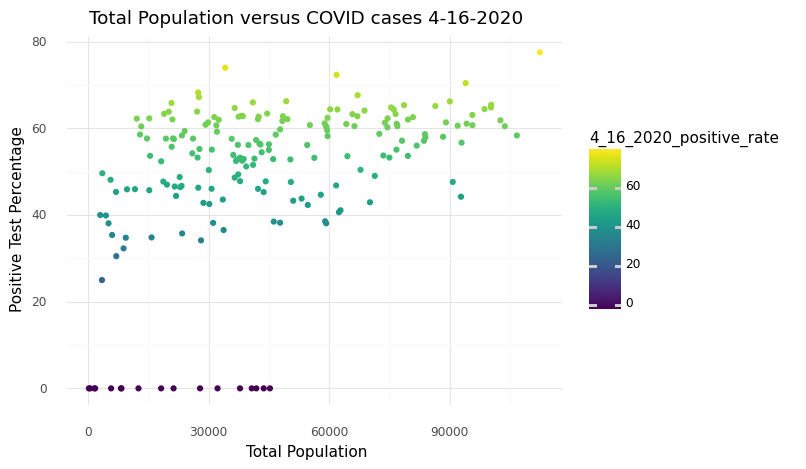

<ggplot: (-9223371956924430768)>

In [27]:
(ggplot(ny, aes(x='tot_pop', y='4_16_2020_positive_rate', color= '4_16_2020_positive_rate'))+ geom_point()+theme_minimal()+ ggtitle("Total Population versus COVID cases 4-16-2020")+ xlab("Total Population")+ylab("Positive Test Percentage"))

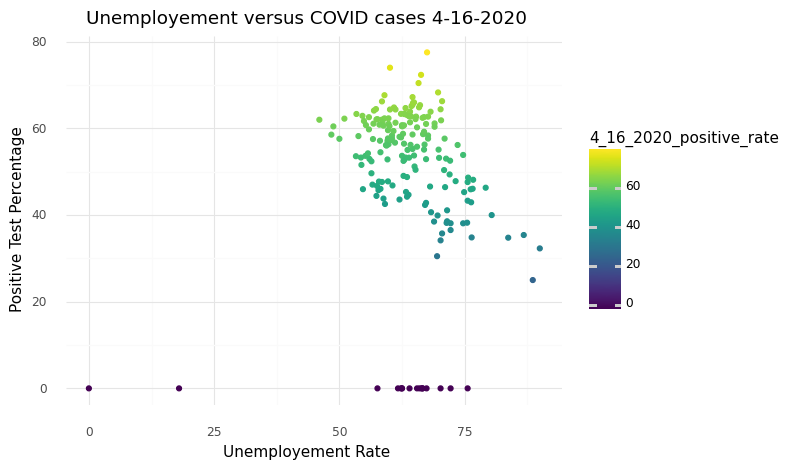

<ggplot: (-9223371956922233852)>

In [28]:
(ggplot(ny, aes(x='unemployment_rate', y='4_16_2020_positive_rate', color= '4_16_2020_positive_rate'))+ geom_point()+theme_minimal()+ ggtitle("Unemployement versus COVID cases 4-16-2020")+ xlab("Unemployement Rate")+ylab("Positive Test Percentage"))

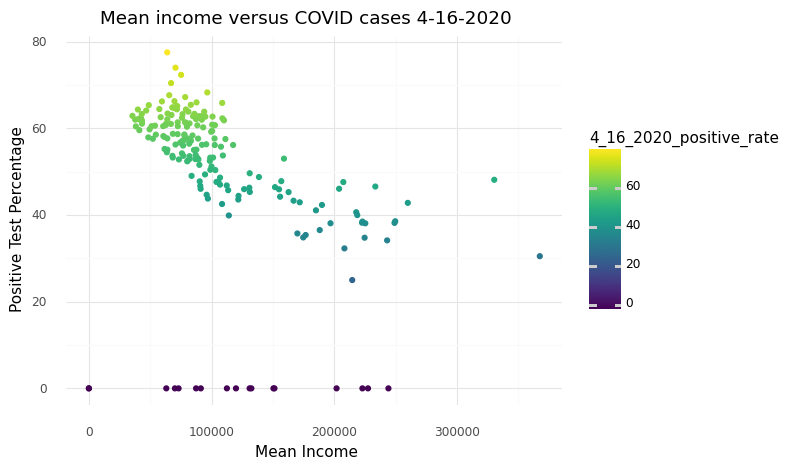

<ggplot: (-9223371956922193324)>

In [29]:
(ggplot(ny, aes(x='mean_incom', y='4_16_2020_positive_rate', color= '4_16_2020_positive_rate'))+ geom_point()+theme_minimal()+ ggtitle("Mean income versus COVID cases 4-16-2020")+ xlab("Mean Income")+ylab("Positive Test Percentage"))

In [30]:
#creating a subset of the ny dataframe containing socio-economic variables
df = ny[['tot_pop','disabled', 'per_disabled', 'unemployment_rate','tot_households_snap','households_snap','per_households_snap','tot_pop_mobility','less_10k','10k_15k','15k_25k','25k_35k','35k_50k','50k_75k','75k_100k','100k_150k','150k_200k','more_200k','med_income','mean_incom','non_citizen','pop_pov','pop_below_','pcnt_pov','families_on_suplimental_income','families_on_social_security','insured','per_insured','uninsured','per_uninsured','owner','rent', '4_16_2020_positive_rate']].copy()

features = ['tot_pop','disabled', 'per_disabled', 'unemployment_rate','tot_households_snap','households_snap','per_households_snap','tot_pop_mobility','less_10k','10k_15k','15k_25k','25k_35k','35k_50k','50k_75k','75k_100k','100k_150k','150k_200k','more_200k','med_income','mean_incom','non_citizen','pop_pov','pop_below_','pcnt_pov','families_on_suplimental_income','families_on_social_security','insured','per_insured','uninsured','per_uninsured','owner','rent']

In [31]:
#standardize variables
zScore = StandardScaler() #standardize variables makes them easier with the math
zScore.fit(df[features])
df[features] = zScore.transform(df[features])

In [32]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 5, rotation=None)
fa.fit(df[features])

loadings = fa.loadings_

# Check Eigenvalues
ev, v =  fa.get_eigenvalues()

#create dataframe with relations between factors and variables
meaning = pd.DataFrame(loadings, columns = ['factor1', 'factor2','factor3','factor4','factor5'], index=features)
meaning

,factor1,factor2,factor3,factor4,factor5
tot_pop,0.836267,0.543765,0.031111,-0.023744,-0.044915
disabled,0.898024,0.256774,0.132348,0.159859,-0.089742
per_disabled,0.374822,-0.369962,-0.051127,0.396301,-0.167317
unemployment_rate,-0.319211,0.396844,0.212329,-0.059144,0.589986
tot_households_snap,0.732409,0.588941,0.184262,0.044988,-0.071236
households_snap,0.912059,-0.014669,0.280308,0.059714,0.045686
per_households_snap,0.830969,-0.394368,0.150628,0.123576,0.133156
tot_pop_mobility,0.835847,0.544910,0.029210,-0.023882,-0.045705
less_10k,0.680071,-0.368770,0.312668,0.136480,0.094291
10k_15k,0.740718,-0.421340,0.200697,0.284955,0.005535


In [33]:
# get the column name of max values in every row
maxValueIndexObj = meaning.idxmax(axis=1)
 
print("Max values of row are at following columns :")
print(maxValueIndexObj)

Max values of row are at following columns :
tot_pop                           factor1
disabled                          factor1
per_disabled                      factor4
unemployment_rate                 factor5
tot_households_snap               factor1
households_snap                   factor1
per_households_snap               factor1
tot_pop_mobility                  factor1
less_10k                          factor1
10k_15k                           factor1
15k_25k                           factor1
25k_35k                           factor1
35k_50k                           factor1
50k_75k                           factor1
75k_100k                          factor2
100k_150k                         factor2
150k_200k                         factor2
more_200k                         factor3
med_income                        factor2
mean_incom                        factor3
non_citizen                       factor1
pop_pov                           factor1
pop_below_                     

## 1 - Which variables go together using factor analysis?

From this analysis we can see the breakdown of each of the 5 factors and what the variables are that correspond to each. Factor 1 encompasses total population, disabled, total households snap, total population mobility, non_citizen, population in poverty, families on social security, insured, owner, and rent. Factor 2 encompasses primarily percent disabled, households snap, percent households snap, less than 10k, between 10k and 15k, between 12k and 25k, between 25k and 305k. Factor 3 is smaller than the others being primarily comprised of number of people between 35k and 50k, 50k and 75k, and 75k and 100k. Factor 4 is comprised of the higher incomes and mean and median incomes. Strangely, factor 5 is the highest value for only one variable and that is per_uninsured. 

In [34]:
xvals = range(1,df[features].shape[1]+1)

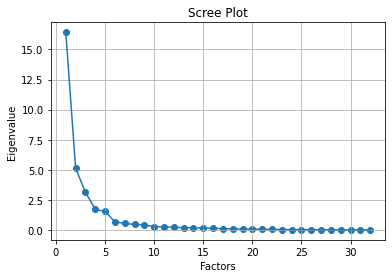

In [35]:
# Create scree plot using matplotlib
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [36]:
variance = fa.get_factor_variance()

vDF = pd.DataFrame(variance, columns = ['factor1', 'factor2','factor3','factor4','factor5'], index= ["SS Loadings", "Proportion Var", "Cumulative Var"])
vDF

,factor1,factor2,factor3,factor4,factor5
SS Loadings,16.310404,4.993170,2.925724,1.532068,1.315206
Proportion Var,0.509700,0.156037,0.091429,0.047877,0.041100
Cumulative Var,0.509700,0.665737,0.757166,0.805043,0.846143


In [37]:
X = df[features]
y = df["4_16_2020_positive_rate"]

In [38]:
model1 = LinearRegression()
model1.fit(X, y)
print("all data without train/test: ", model1.score(X, y))

all data without train/test:  0.5319451640160224


In [40]:
#kfold split
kf = KFold(n_splits = 5)
model2 = LinearRegression()
scores = []

for train, test in kf.split(X,y):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]
    
    model2.fit(X_train,y_train)
    scores.append(model2.score(X_test,y_test))
    covid_pred = model2.predict(X_test)
    
print(scores)
print("mean all data score: ", np.mean(scores))

[-1.1439417235238447, 0.5767110159412059, -0.05024878858004245, -2.864607537089714, -0.17382609197526921]
mean all data score:  -0.7311826250455329


In [41]:
true_v_pred= pd.DataFrame({"predict": covid_pred, "trueV": y_test})

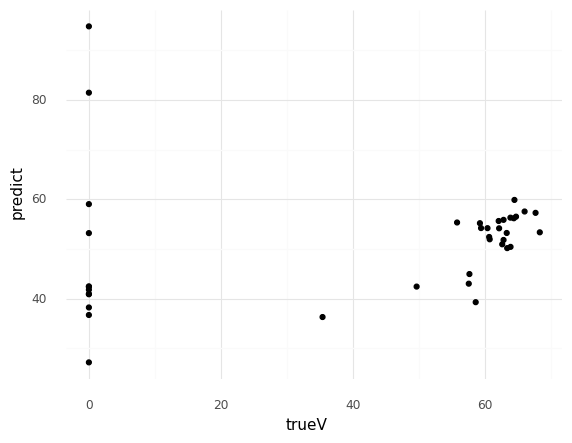

<ggplot: (-9223371956922001304)>

In [42]:
ggplot(true_v_pred, aes(x = "trueV", y = "predict")) +geom_point() +theme_minimal()

In [43]:
#features = ['tot_pop','disabled', 'per_disabled', 'unemployment_rate','tot_households_snap','households_snap','per_households_snap','tot_pop_mobility','less_10k','10k_15k','15k_25k','25k_35k','35k_50k','50k_75k','75k_100k','100k_150k','150k_200k','more_200k','med_income','mean_incom','non_citizen','pop_pov','pop_below_','pcnt_pov','families_on_suplimental_income','families_on_social_security','insured','per_insured','uninsured','per_uninsured','owner','rent']

fact = fa.transform(df[features])
fact = pd.DataFrame(fact)

model3 = LinearRegression()
model3.fit(fact, df["4_16_2020_positive_rate"])
print("5 factors: ", model3.score(fact, df["4_16_2020_positive_rate"]))

5 factors:  0.3939553988823895


In [44]:
X = fact
y = df["4_16_2020_positive_rate"]

#kfold split
kf = KFold(n_splits = 5)
model4 = LinearRegression()
scores = []

for train, test in kf.split(X,y):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]
    
    model4.fit(X_train,y_train)
    scores.append(model4.score(X_test,y_test))
    covid_pred = model4.predict(X_test)
    
print(scores)
print("mean all data score: ", np.mean(scores))

[-0.878114700556069, 0.6870660904072132, 0.15241294913802728, -1.1103454432571058, 0.11145437403451186]
mean all data score:  -0.20750534604668447


In [45]:
true_v_pred = pd.DataFrame({"predict": covid_pred, "trueV": y_test})

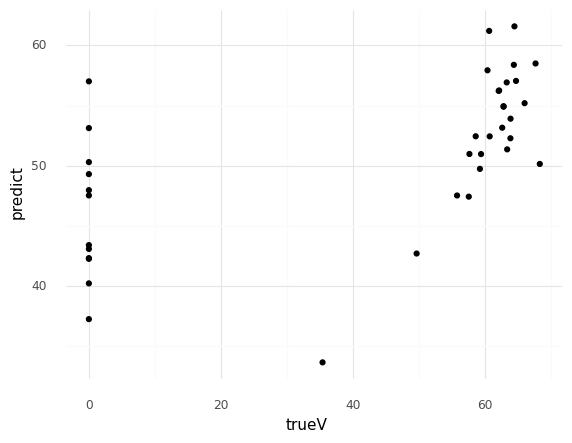

<ggplot: (-9223371956919756384)>

In [46]:
ggplot(true_v_pred, aes(x = "trueV", y = "predict")) +geom_point() +theme_minimal()

## 2 - Which of these factors predict COVID cases?

The model with all 33 socio-economic variables fit with a linear model did not predict the number of COVID cases on 4/16/2020 that well. Without a train - test split it had an r2 score of roughly 0.5. We can see that the model was fitting to noise however because when a fit was performed using a train test split the model had a negative r2 score. This can happen if the regression line that the model predicts is worse than simply using the mean value, which is why r squared values are usually non-negative. 

The model with the 5 factored variables did not predict the COVID cases to any level os significance with an r2 score of 0.39 without using a kfold train test split. With a train test split the model had a score of -0.21.

From this analysis we know that there is some relationship between socio-economic variables and the number of COVID cases however, our model simply did not contain enough information to create an effective predictive model of COVID cases. 

We can see this visually from looking at the graphs from the last test split of predicted values versus true values. We would hope to see a clear diagonal line but see a large scattering of data points instead.


## Question: Does the strictness with which neighborhoods follow social distancing predict COVID cases?

## 3 - Did adherence to social distancing within boroughs affect covid rates 

In [23]:
import geopandas as gpd
import folium

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [24]:
ny_shp = gpd.read_file('data/spatial/bor_zip_codes.shp')

In [25]:
ny = pd.merge(ny_shp, ny, how='inner', left_on='GEOID10', right_on='GEOID_ZIP')
ny.crs= {'init': 'epsg:4326'} #WGS84

In [26]:
map = folium.Map(location=[40.692416, -74.025393],zoom_start=10)
poly = ny.to_crs(epsg=4326).to_json()
geom = folium.features.GeoJson(poly)
map.add_child(geom)
map

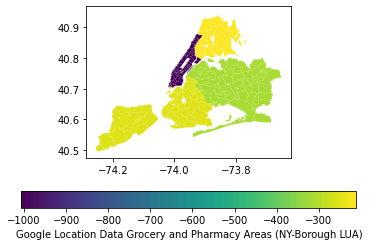

In [29]:
fig, ax = plt.subplots(1, 1)

ny.plot(column='grocery_and_pharmacy_percent_change_from_baseline_sum',
        ax=ax,
        legend=True,
        legend_kwds={'label': "Google Location Data Grocery and Pharmacy Areas (NY-Borough LUA)",
        'orientation': "horizontal"})
plt.show()

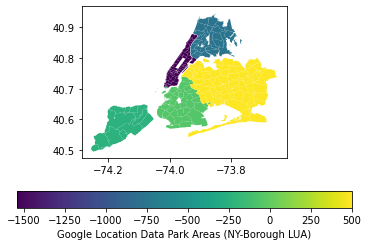

In [30]:
fig, ax = plt.subplots(1, 1)

ny.plot(column='parks_percent_change_from_baseline_sum',
        ax=ax,
        legend=True,
        legend_kwds={'label': "Google Location Data Park Areas (NY-Borough LUA)",
        'orientation': "horizontal"})
plt.show()

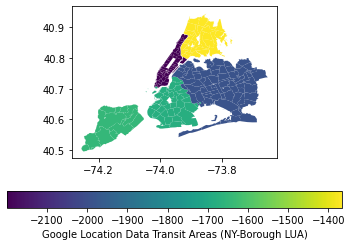

In [31]:
fig, ax = plt.subplots(1, 1)

ny.plot(column='transit_stations_percent_change_from_baseline_sum',
        ax=ax,
        legend=True,
        legend_kwds={'label': "Google Location Data Transit Areas (NY-Borough LUA)",
        'orientation': "horizontal"})
plt.show()

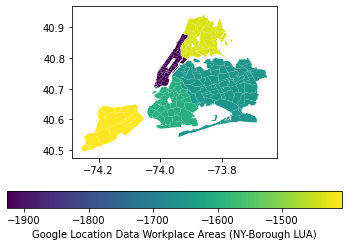

In [32]:
fig, ax = plt.subplots(1, 1)

ny.plot(column='workplaces_percent_change_from_baseline_sum',
        ax=ax,
        legend=True,
        legend_kwds={'label': "Google Location Data Workplace Areas (NY-Borough LUA)",
        'orientation': "horizontal"})
plt.show()

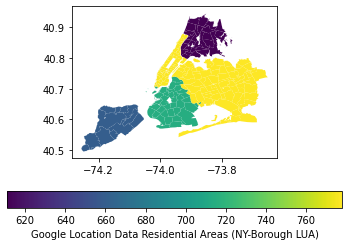

In [33]:
fig, ax = plt.subplots(1, 1)

ny.plot(column='residential_percent_change_from_baseline_sum',
        ax=ax,
        legend=True,
        legend_kwds={'label': "Google Location Data Residential Areas (NY-Borough LUA)",
        'orientation': "horizontal"})
plt.show()

In [126]:
predictors = ["grocery_and_pharmacy_percent_change_from_baseline_sum", "parks_percent_change_from_baseline_sum", "transit_stations_percent_change_from_baseline_sum", "workplaces_percent_change_from_baseline_sum", "residential_percent_change_from_baseline_sum"]

# Not standardizing because vars are on the same scale
X_train, X_test, y_train, y_test = train_test_split(ny[predictors], ny["4_16_2020_positive"], test_size=0.2,random_state=123)

In [127]:
mod = sm.OLS(y_train,X_train)
fit = mod.fit()

In [128]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     4_16_2020_positive   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     9.840
Date:                Mon, 18 May 2020   Prob (F-statistic):           4.26e-07
Time:                        15:05:09   Log-Likelihood:                -1162.7
No. Observations:                 155   AIC:                             2335.
Df Residuals:                     150   BIC:                             2351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
grocery_and_pharmacy_percent_change_from_baseline_sum    -0.1878      3.876     -0.048      0.961      -7.847       7.471
parks_percent_change_from_baseline_sum                   -0.4909      0.224     -2.188      0.030      -0.934      -0.048
transit_stations_percent_change_from_baseline_sum         2.2182      4.842      0.458      0.648      -7.349      11.785
workplaces_percent_change_from_baseline_sum               2.9630      5.505      0.538      0.591      -7.914      13.840
residential_percent_change_from_baseline_sum             12.8128     22.155      0.578      0.564     -30.963      56.589
==============================================================================
Omnibus:                       45.945   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.431
Skew:                           1.174   Prob(JB):                     2.13e-28
Kurtosis:                       6.771   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
test_preds = fit.predict(X_test)

In [39]:
true_v_pred = pd.DataFrame({"predict": test_preds, "trueV": y_test})

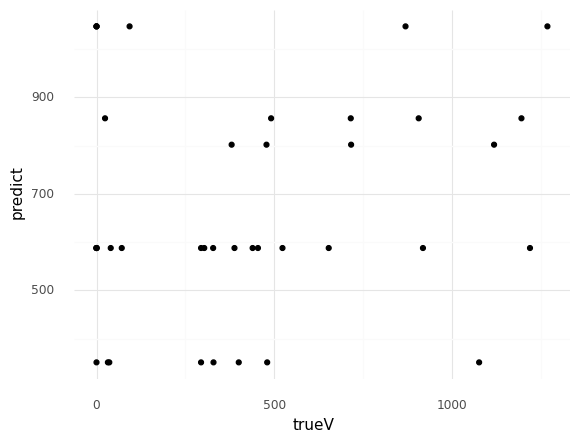

<ggplot: (-9223371926141137080)>

In [40]:
ggplot(true_v_pred, aes(x = "trueV", y = "predict")) +geom_point() +theme_minimal()

In [41]:
print('testing r2 is:', r2_score(test_preds, y_test))

testing r2 is: -3.602135009041927


## 3 - Did adherence to social distancing within boroughs affect covid rates 

It does not 

## Question: What does a disadvantaged group look like in terms of COVID cases?


## 4 - Would a clustering model help us group zipcodes together

## 5 - How well do these clustered groups predict COVID


## Question: Are beds being allocated to areas most affected by covid?


## 6 - What variables contribute to allocation of resources
